# Tutorial Naive Bayes

Author: Ridha Fathima Mohideen Malik

In this notebook, we use Naive Bayes (NB) to classify exoplanets. We explore data taken from the NASA exoplanet archive to understand the NB classification, what data is suitable for it and its limitations.

In [37]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

## Transits

### Data exploration

In [4]:
# importing data and selecting columns

trans = pd.read_csv('D:/comp-astro/comp-astro/exoplanet-data/TOI_2023.03.23_03.52.47.csv', sep=',', comment='#')

trans_clean = trans[['tid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_eqt', 
                     'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad']]

In [5]:
# creating two classes

trans_clean['pl_rade_flag'] = np.where((trans_clean['pl_rade'] <= 10), 'earth-ish', 'higher')

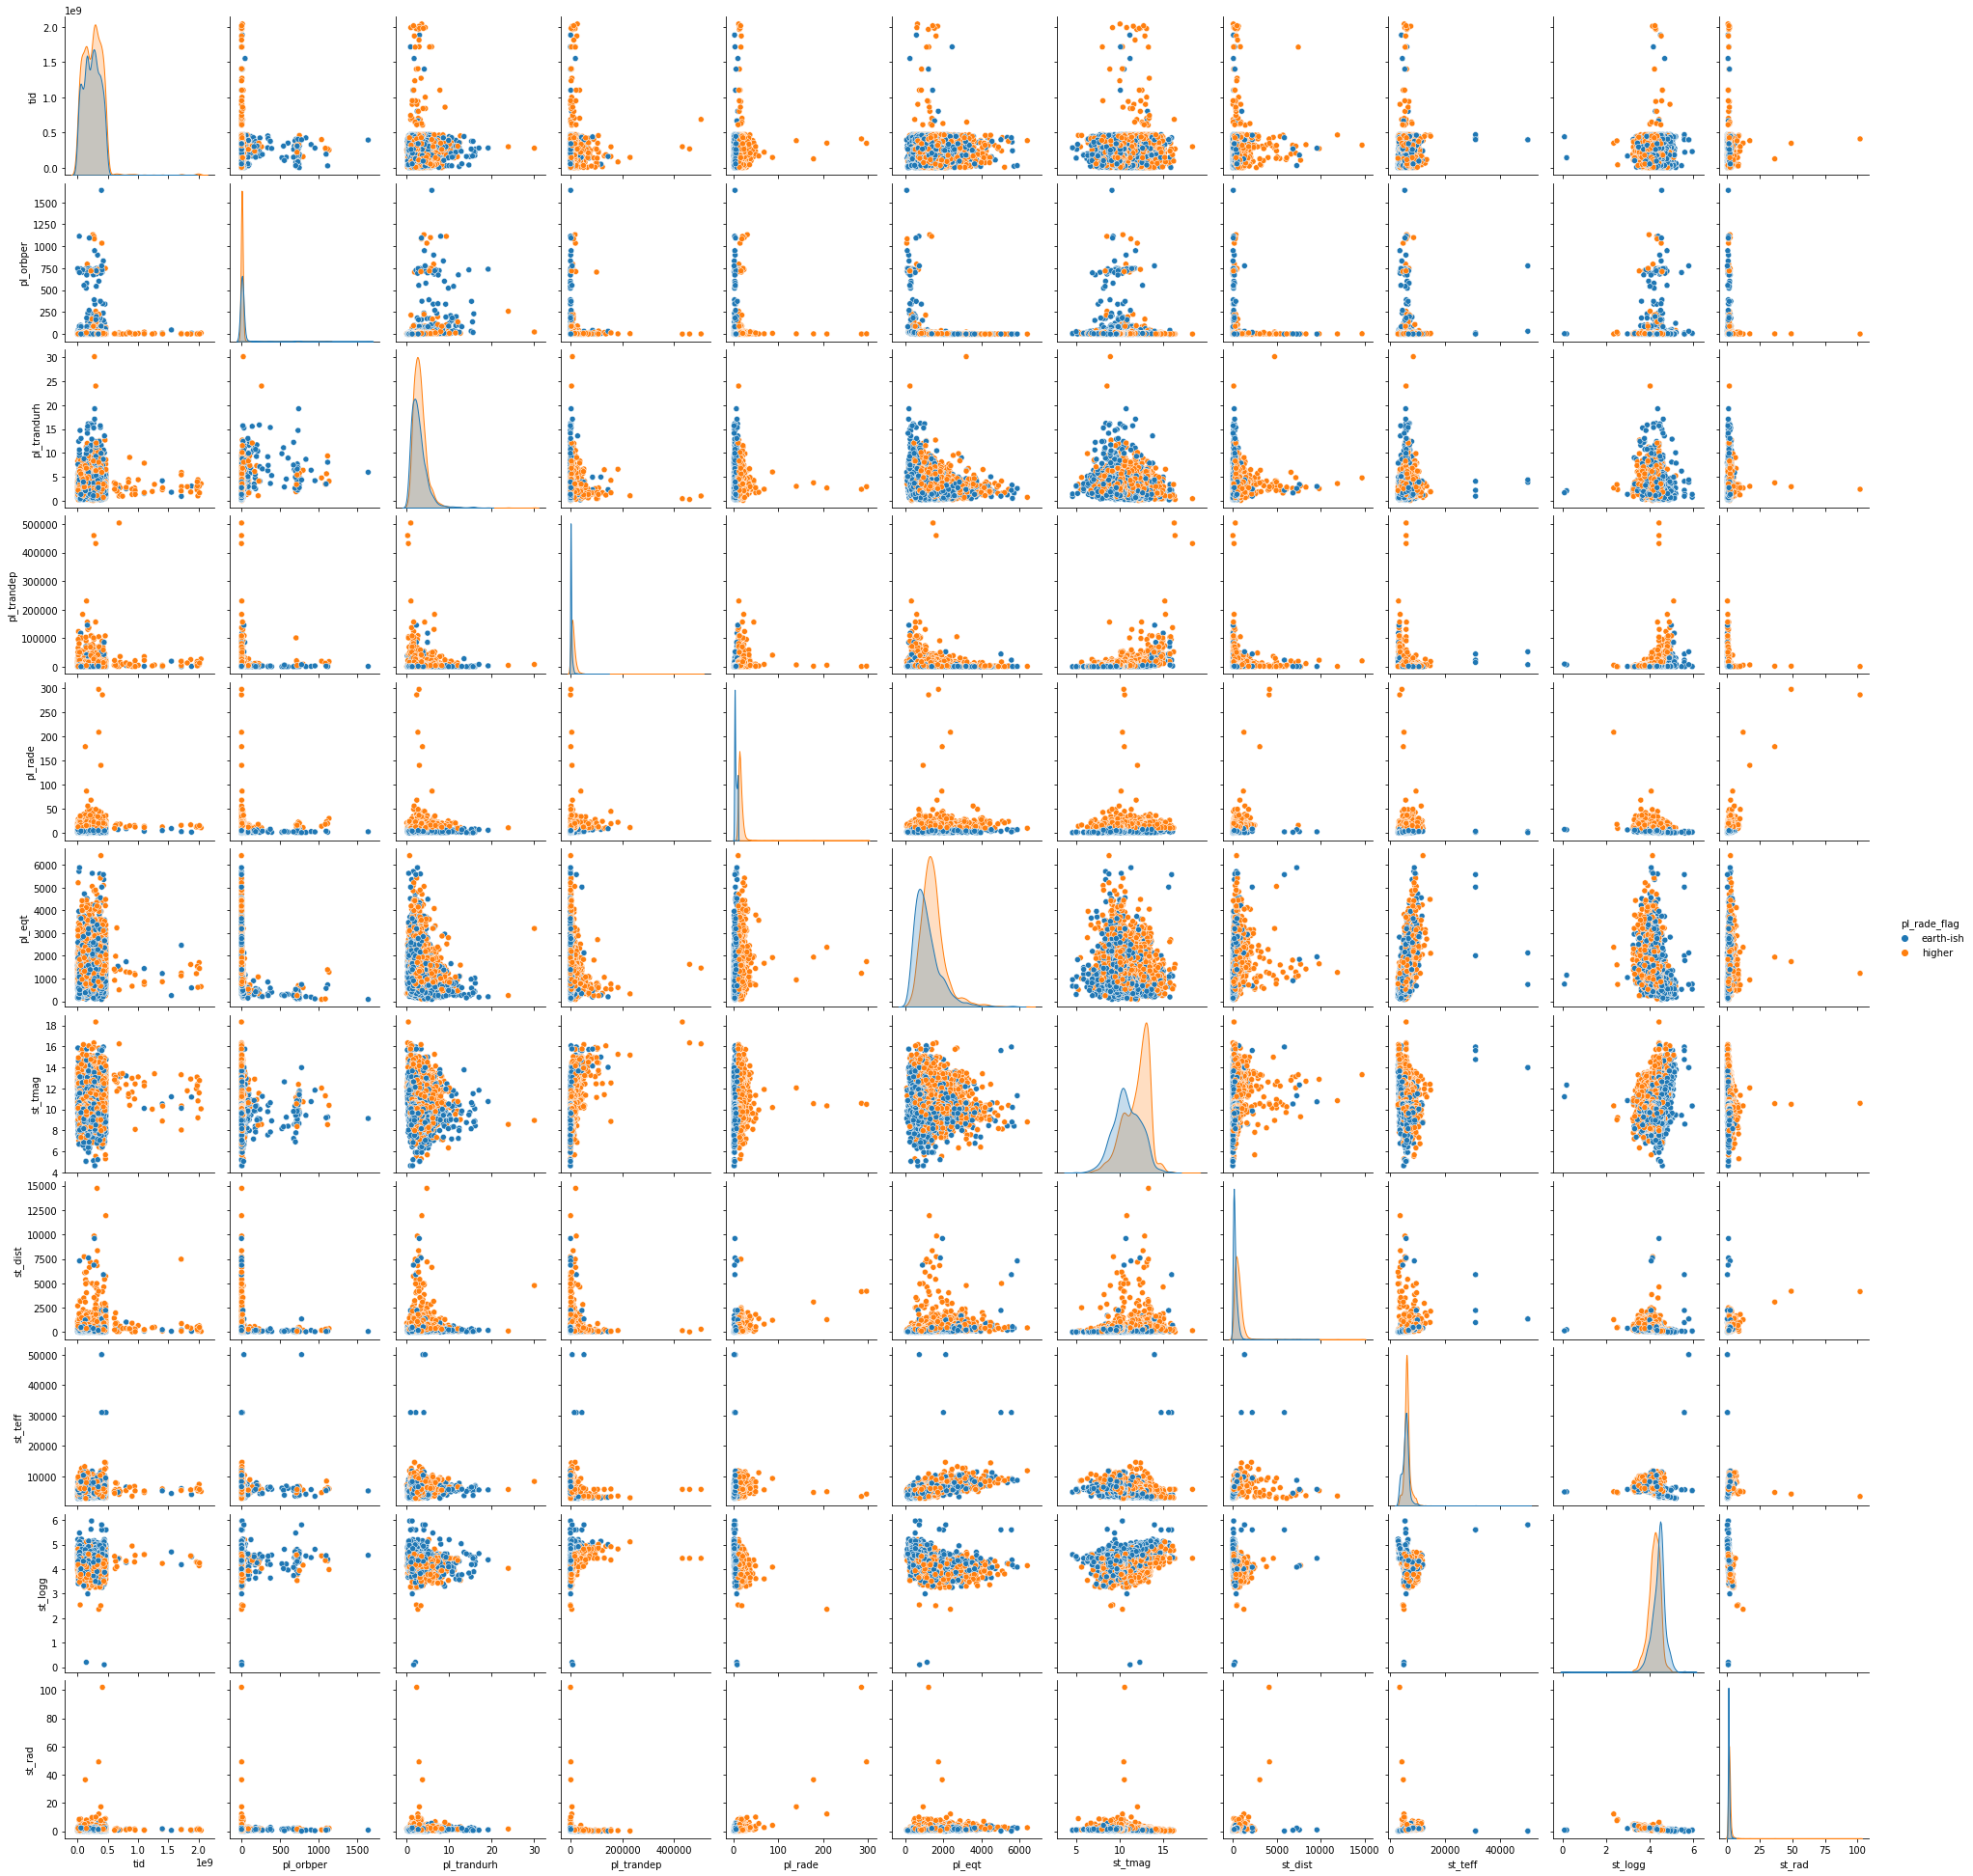

In [7]:
# exploring distribution

sns.pairplot(trans_clean, hue = 'pl_rade_flag')

The distributions are clustered in the plots and it is not possible to find two classes here.

## Direct imaging

### Data exploration

In [6]:
# importing data and selecting columns

di = pd.read_csv('D:/comp-astro/comp-astro/exoplanet-data/directimaging_2023.03.23_03.57.03.csv', sep=',', comment='#')

di_clean = di[['plntname', 'imsep', 'implmass', 'implradius', 'implstype', 'impltemp', 
               'implnjmag', 'implnhmag', 'implnkmag', 'implnlpmag', 'immass', 'imjmag', 
               'imlum', 'imstype', 'image', 'imdisk']]

In [7]:
# creating two classes

di_clean['mass_flag'] = np.where((di_clean['implmass'] <= 10), '0', '1')

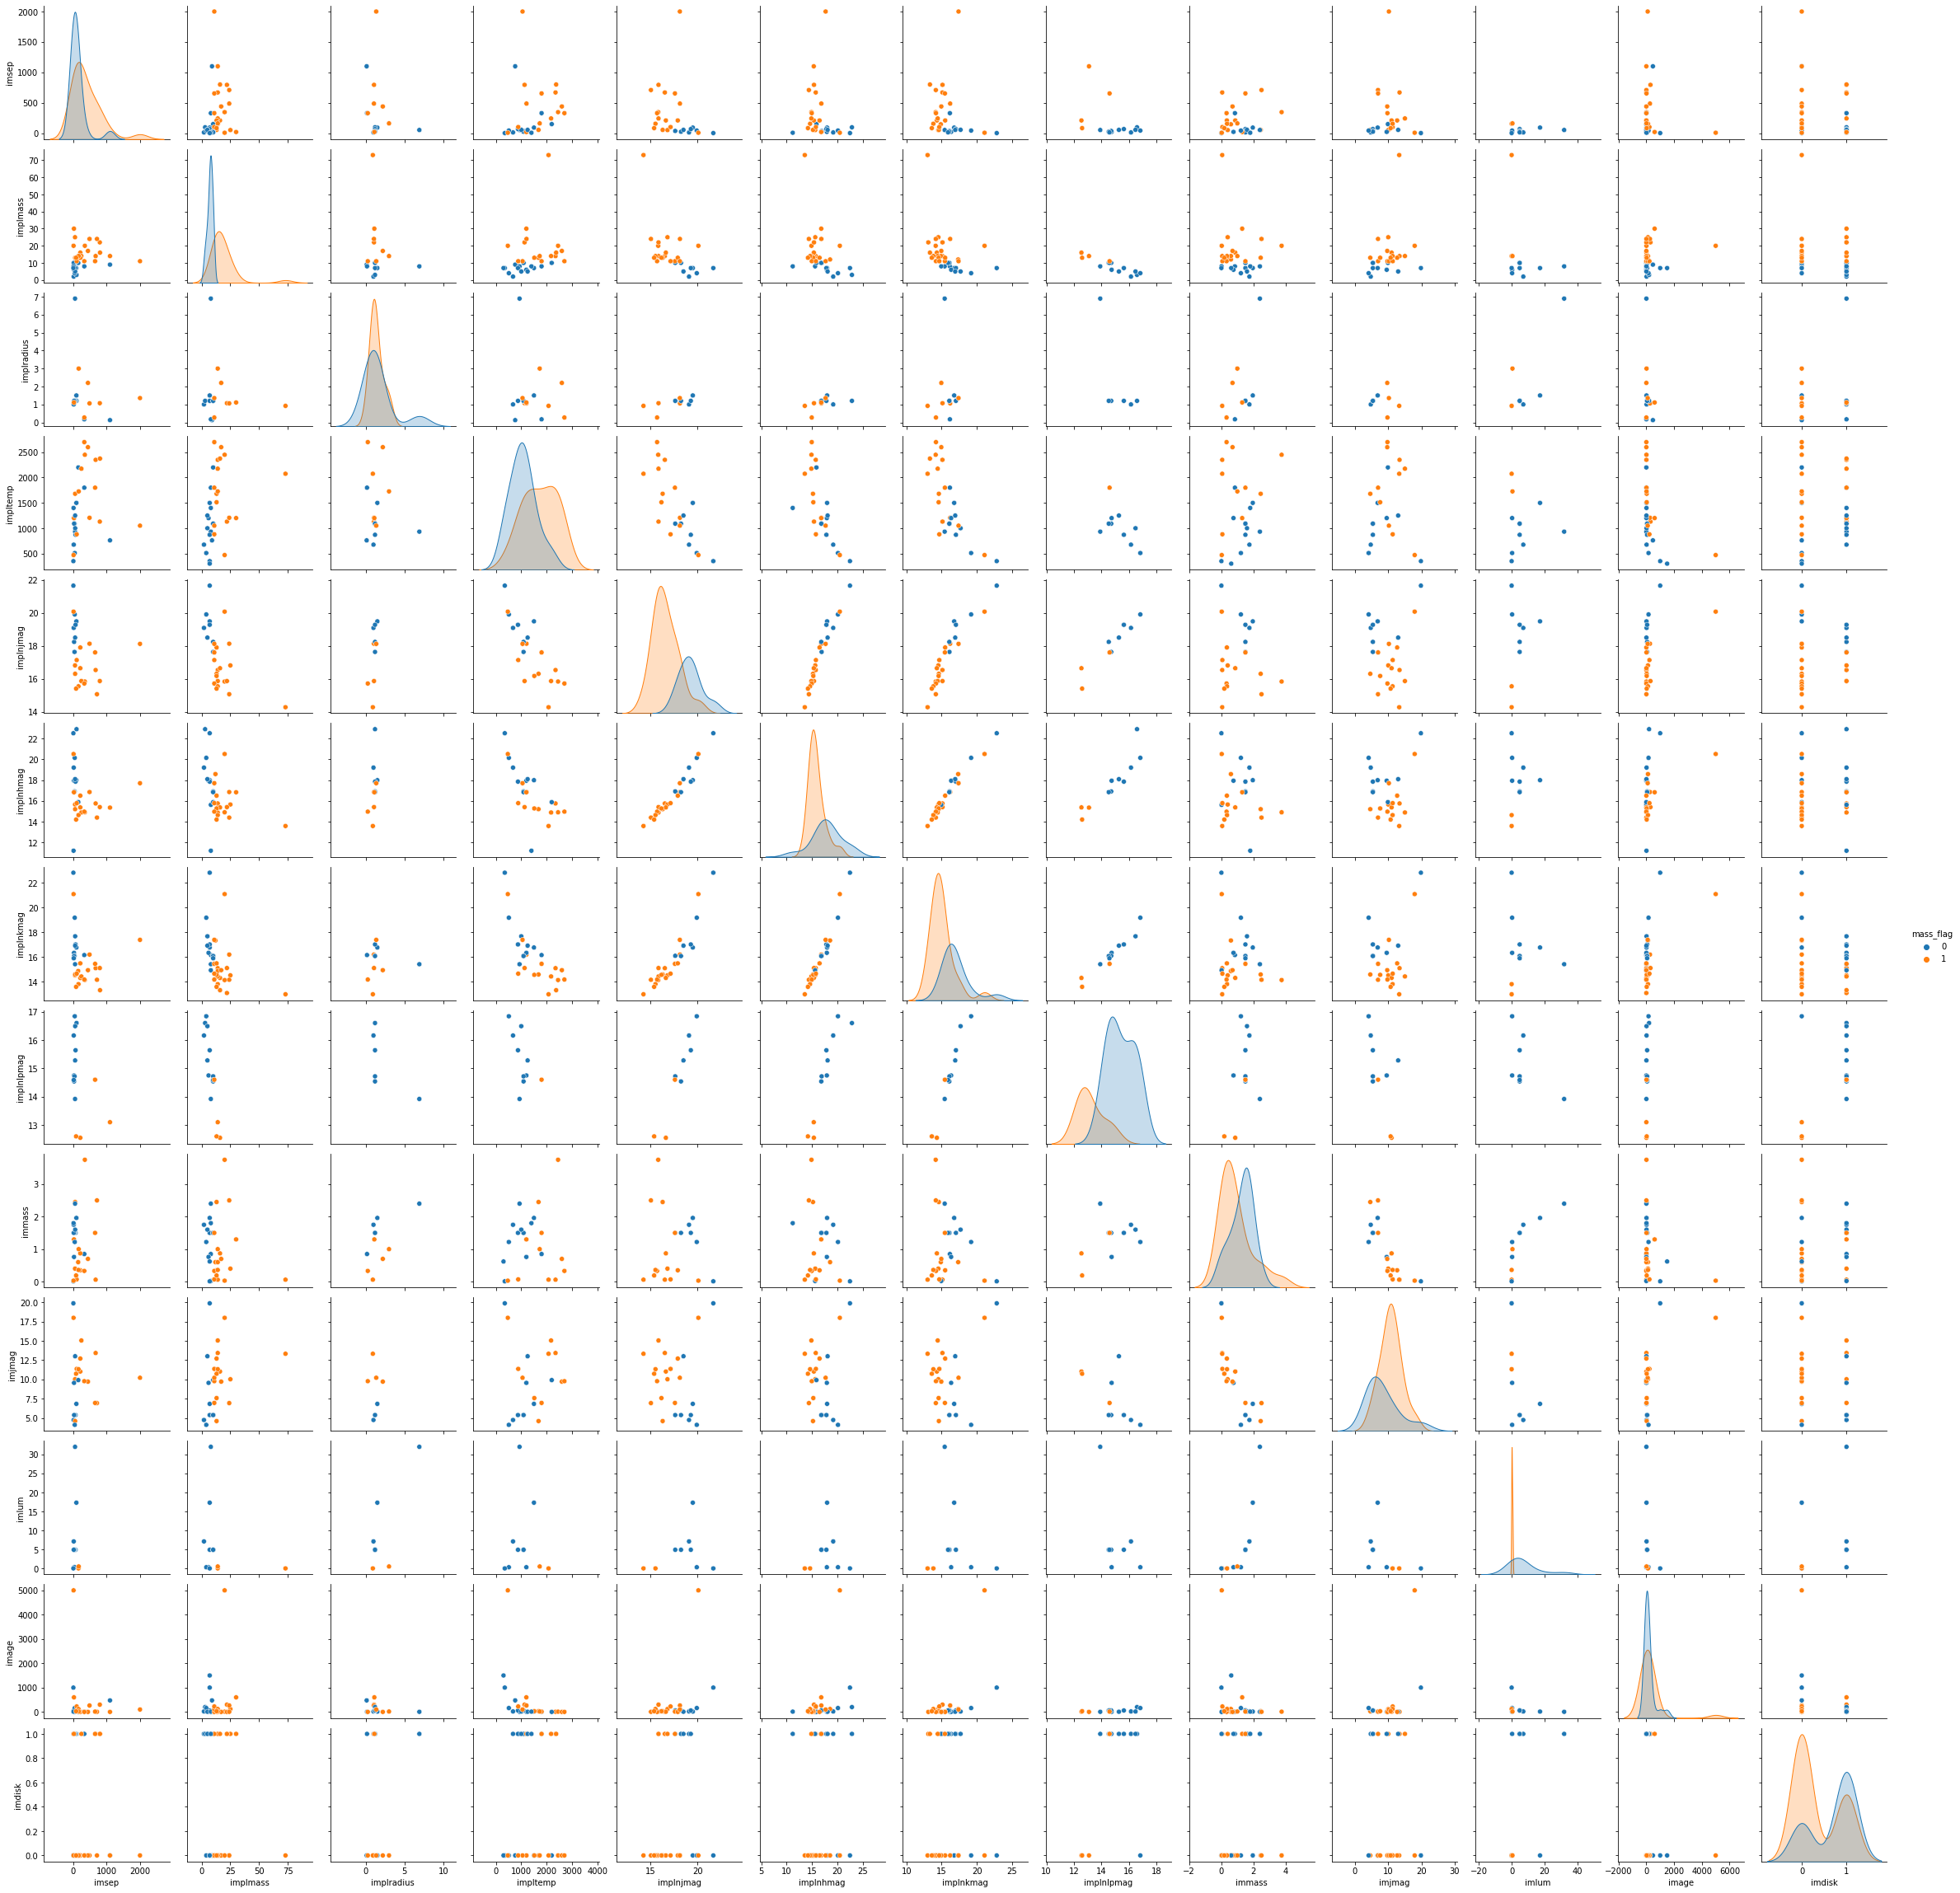

In [27]:
# exploring distribution

sns.pairplot(di_clean, hue = 'mass_flag')

### Gaussian NB

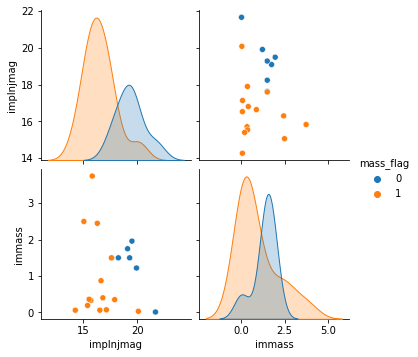

In [9]:
# choosing features for classification

di_train = di_clean[['implnjmag', 'immass', 'mass_flag']]
di_train.dropna(inplace=True)

sns.pairplot(di_train, hue = 'mass_flag')

In [10]:
# splitting train and test data

Xdi = di_train.drop('mass_flag', axis = 1)
ydi = di_train['mass_flag']
X_traindi, X_testdi, y_traindi, y_testdi = train_test_split(Xdi, ydi, test_size=0.30)

In [11]:
# fitting a model

modeldi = GaussianNB()
modeldi.fit(X_traindi, y_traindi)

GaussianNB()

In [12]:
# predicting labels

y_preddi = modeldi.predict(X_testdi)

Text(91.68, 0.5, 'True label')

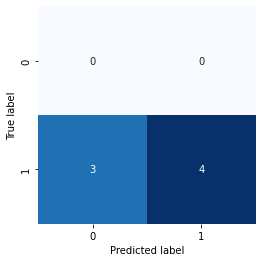

In [13]:
# confusion matrix

matdi = confusion_matrix(y_testdi, y_preddi)

sns.heatmap(matdi.T, square=True, annot=True, fmt='d', cbar=False, cmap=plt.cm.Blues,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted label')
plt.ylabel('True label')

This dataset is too small to train and test, and hence we cant validate our results.

## All exoplanets

### Data exploration

In [15]:
# importing data and selecting columns

complete = pd.read_csv('D:/comp-astro/comp-astro/exoplanet-data/PS_2023.03.23_04.47.34.csv', sep=',', comment='#')

complete_clean = complete[['pl_name', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 
               'pl_orbper', 'pl_orbsmax', 'pl_radj', 'pl_bmassj', 'pl_orbeccen', 'pl_eqt', 
               'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 
               'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag']]

## creating two classes
## radial velocity method is 1. imaging methods are 0

complete_clean['discovery_flag'] = np.where((complete_clean['discoverymethod'] == 'Radial Velocity'), '1', '0') 

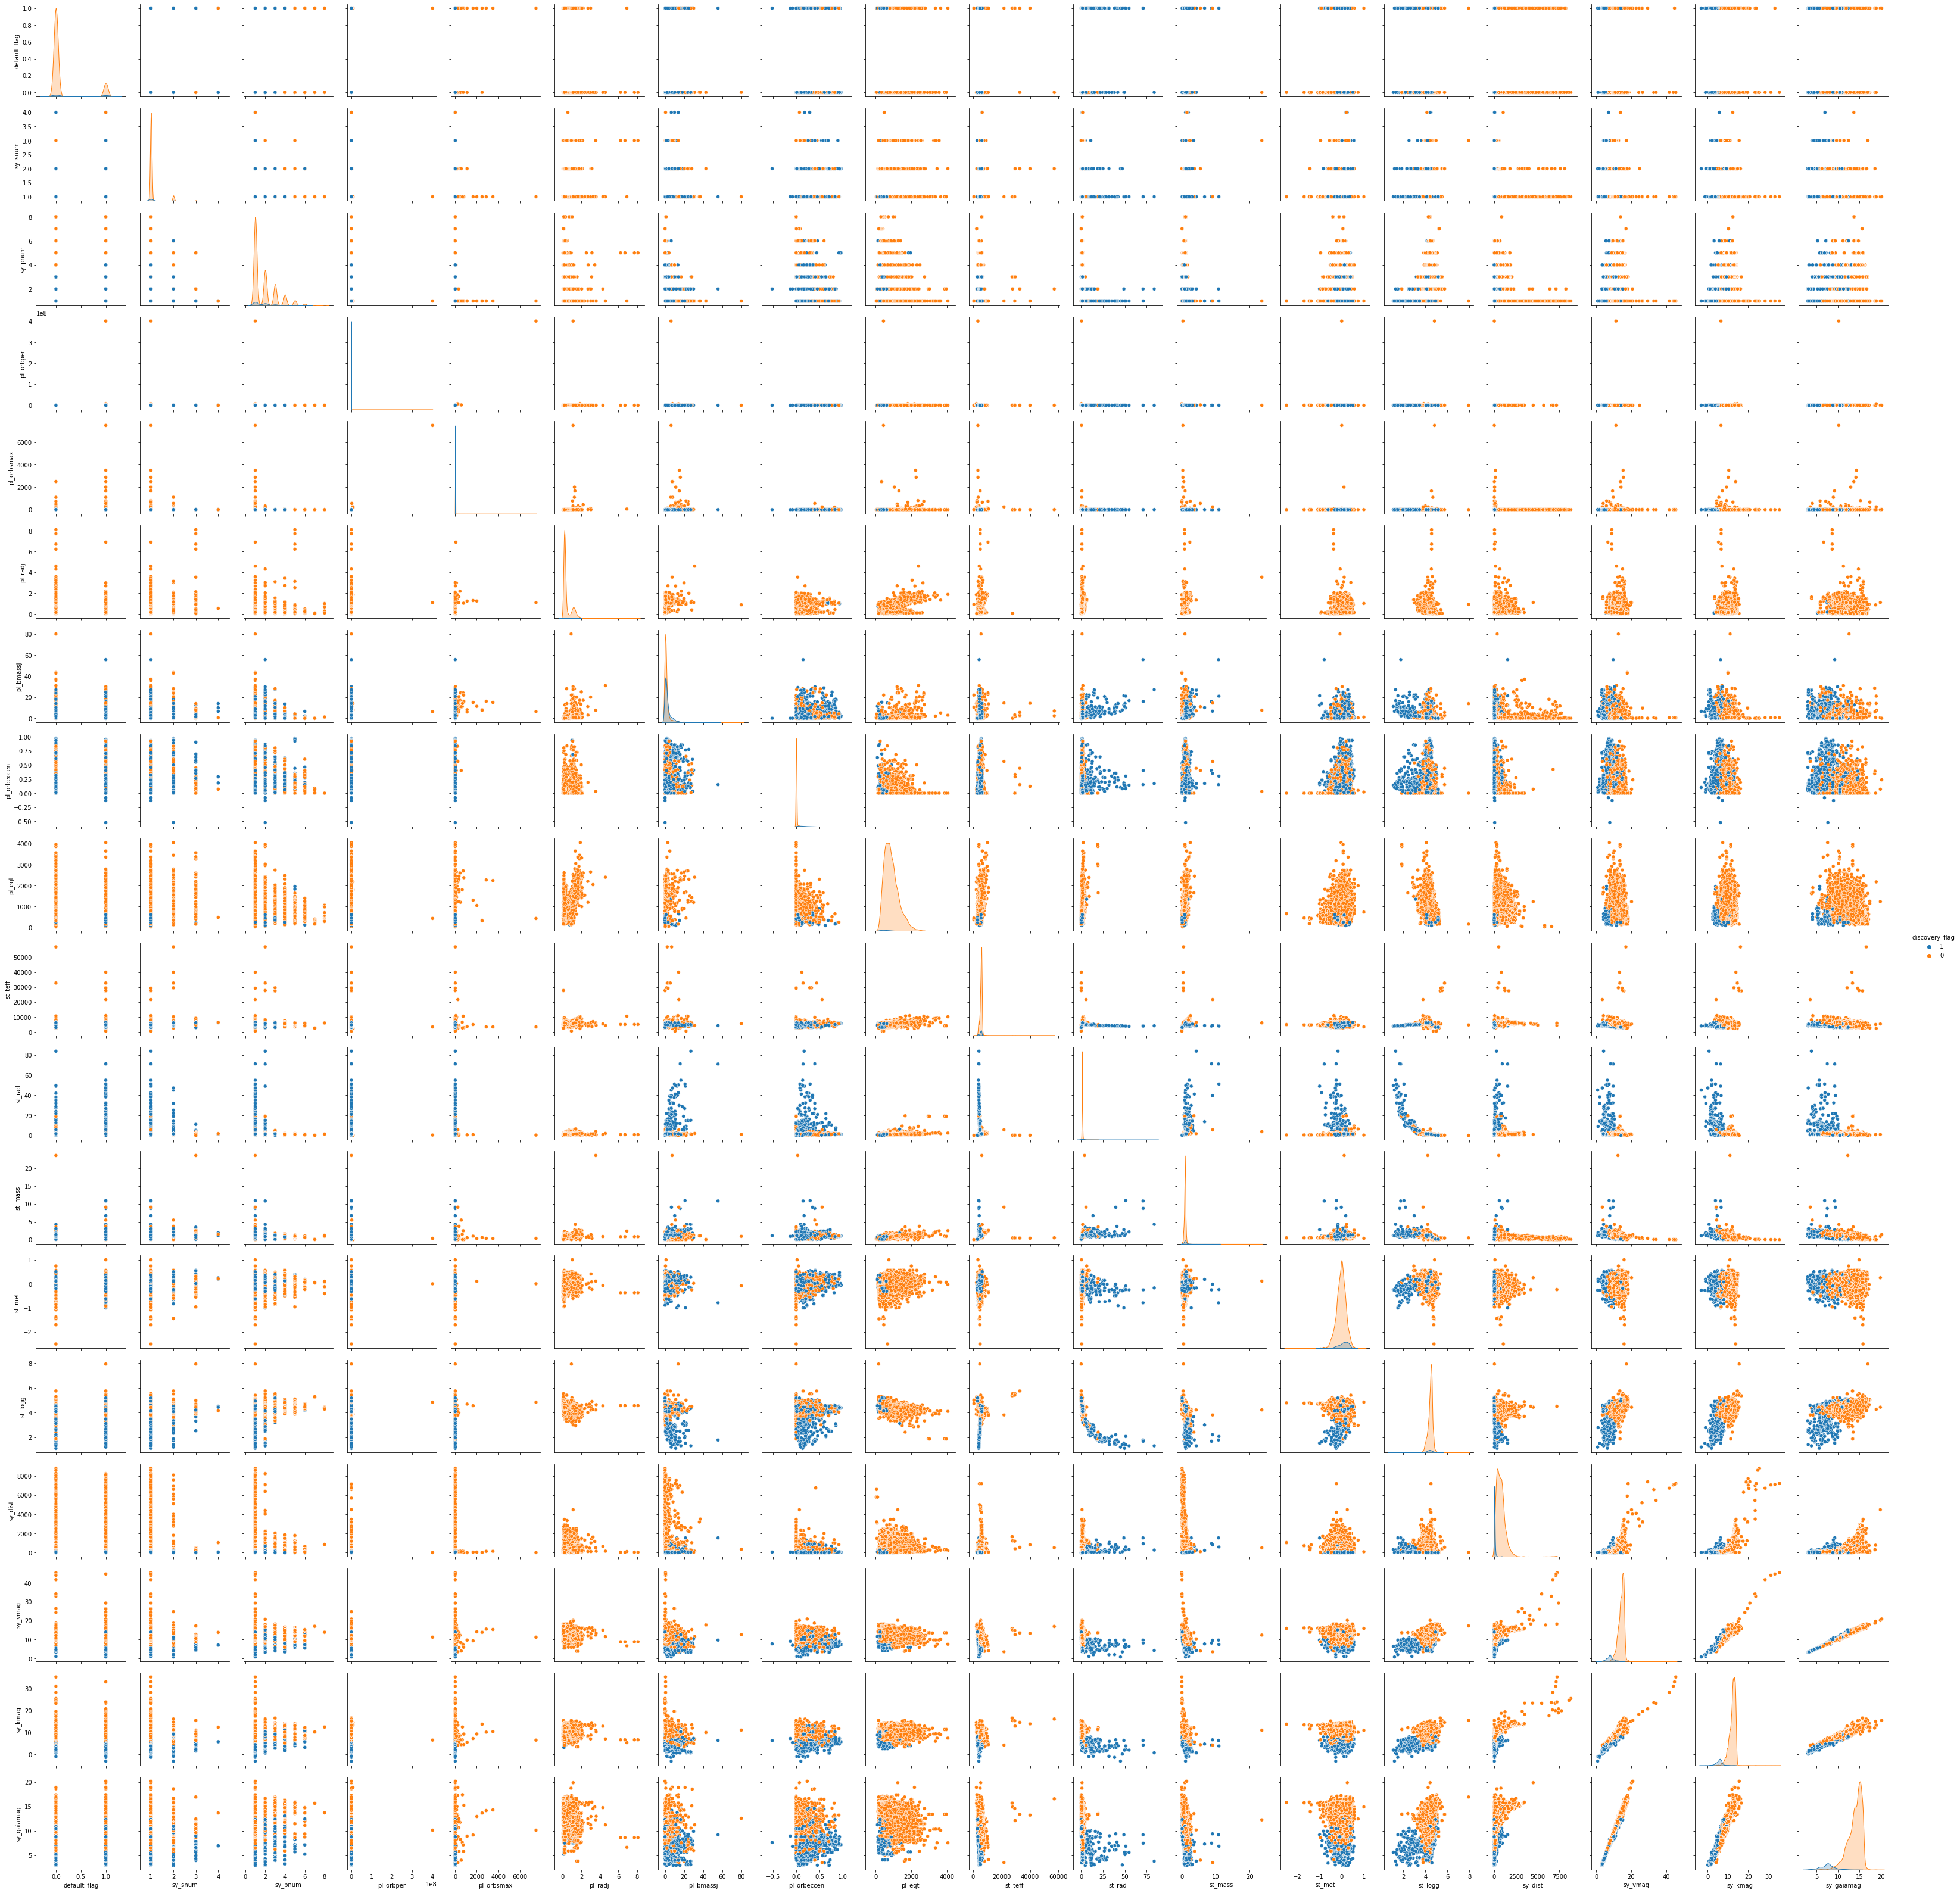

In [145]:
# exploring distribution

sns.pairplot(complete_clean, hue = 'discovery_flag')

### Simple NB

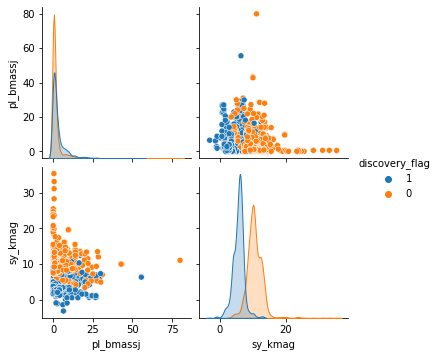

In [17]:
# choosing features for classification

complete_train1 = complete_clean[['pl_bmassj', 'sy_kmag', 'discovery_flag']]
complete_train1.dropna(inplace=True)

sns.pairplot(complete_train1, hue = 'discovery_flag')

In [18]:
# splitting train and test data

X1 = complete_train1.drop('discovery_flag', axis = 1)
y1 = complete_train1['discovery_flag']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)

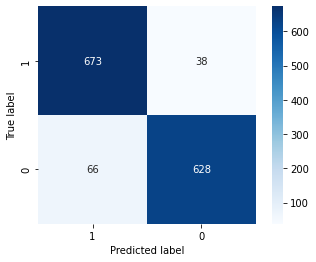

In [40]:
# GaussianNB

## fitting a model

model1 = GaussianNB()
model1.fit(X_train1, y_train1)

## predicting labels
y_pred1 = model1.predict(X_test1)

## results

mat1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

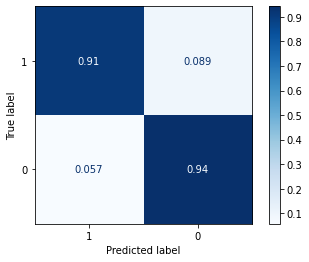

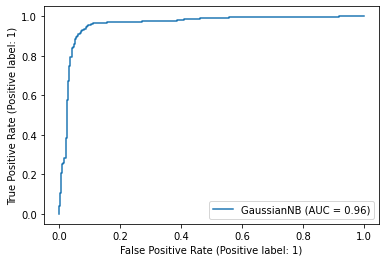

In [47]:
# normalised results

ConfusionMatrixDisplay.from_estimator(
    model1,
    X_test1,
    y_test1,
    display_labels=[1,0],
    cmap=plt.cm.Blues,
    normalize='true',
)

RocCurveDisplay.from_estimator(model1, X_test1, y_test1)

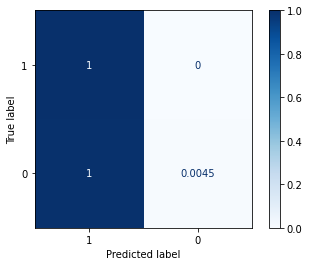

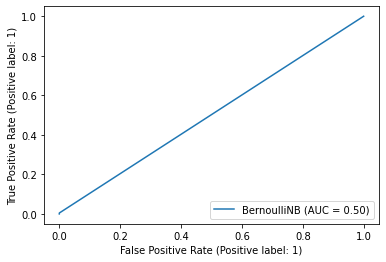

In [44]:
# GaussianNB

## fitting a model

model2 = BernoulliNB()
model2.fit(X_train1, y_train1)

## predicting labels
y_pred1 = model1.predict(X_test1)

## results

ConfusionMatrixDisplay.from_estimator(
    model2,
    X_test1,
    y_test1,
    display_labels=[1,0],
    cmap=plt.cm.Blues,
    normalize='true',
)

RocCurveDisplay.from_estimator(model2, X_test1, y_test1)

The Gaussian NB has performed well in distinguishing planets detected by radial veloctiy (1) and imaging techniques (0) using the features - exoplanet's mass and brightness of the system in IR band. 

It is possible to distinguish based on discovery techniques because they have different requirements for detection. To be detected by the radial velocity technique, the planet should be close and massive to have an impact on the star's motion. While for imaging techniques, the planet should be big and farther enough so that their transit is visible as shadow and in case of direct imaging, big, farther and bright enough so that it is visible. We can see in the pairplot of pl_bmassj and sy_kmag that though they are all equally massive, exoplanets detected by imaging techniques are brighter.

The poor performance of BernoulliNB can be explained based on the overlap of the distribution.

Note we have assumed that these features are independent. 

### Multinomial NB

In [51]:
# creating classes

for i, j in enumerate(complete_clean['st_spectype']):
    if type(j) != float: 
        if j[0].upper() in ['O', 'B', 'A']: ## hot stars above 11,000 K
            complete_clean.loc[i, 'st_stype'] = 'OBA'
        elif j[0].upper() in ['F', 'G']:#, 'K', 'M']: ## stars above 6,000K below 11,000K
            complete_clean.loc[i, 'st_stype'] = 'FG'
        elif j[0].upper() in ['K', 'M']: ## stars above 3,500K
            complete_clean.loc[i, 'st_stype'] = 'KM'
        else:
            complete_clean.loc[i, 'st_stype'] = 'C' ## carbon stars, brown dwarfs and white dwarfs in same class
    else:
        complete_clean.loc[i, 'st_stype'] = np.nan

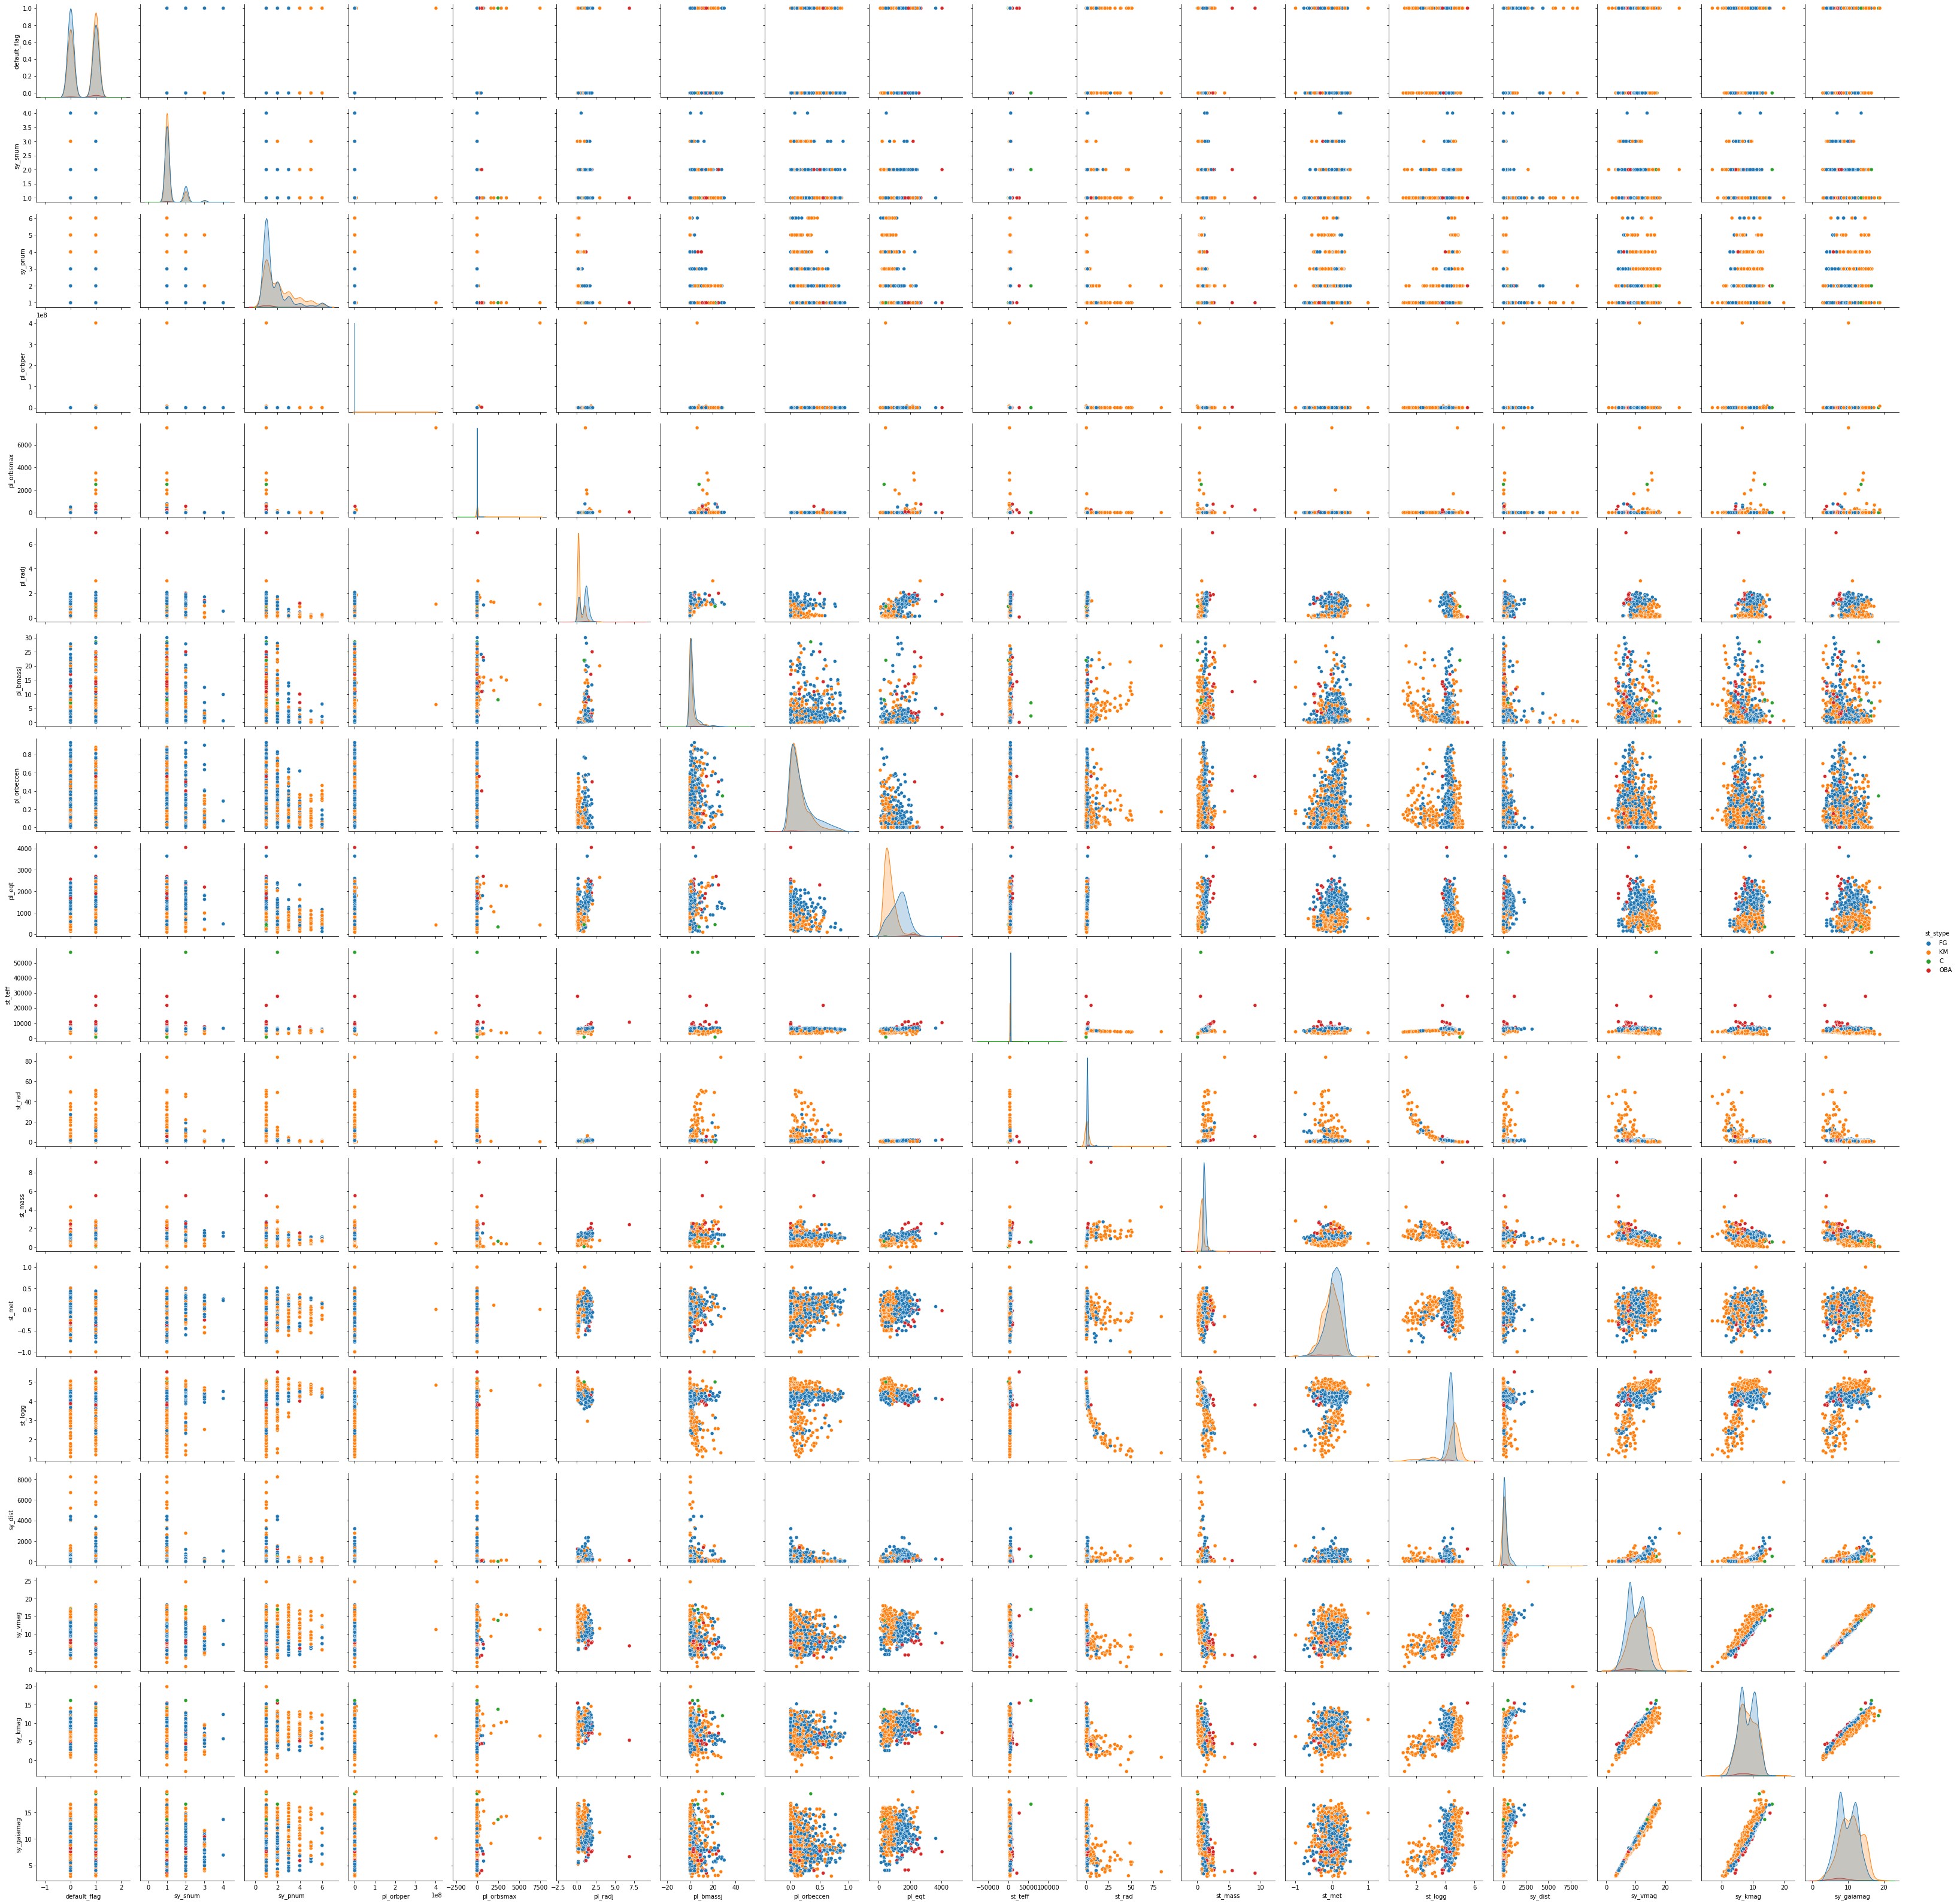

In [75]:
# exploring distribution

sns.pairplot(complete_clean, hue = 'st_stype')

In [52]:
# choosing features for classification

complete_train2 = complete_clean[['pl_eqt', 'sy_kmag', 'st_stype']]
complete_train2.dropna(inplace=True)

In [53]:
# splitting train and test data

X2 = complete_train2.drop('st_stype', axis = 1)
y2 = complete_train2['st_stype']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30)

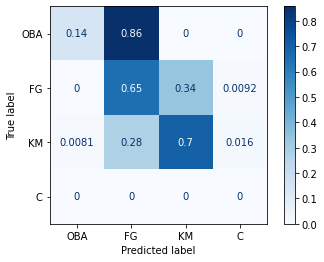

In [57]:
# MultinomialNB

## fitting a model

model3 = MultinomialNB()
model3.fit(X_train2, y_train2)

## predicting labels

y_pred2 = model2.predict(X_test2)

## results

labels=['OBA', 'FG', 'KM', 'C']

ConfusionMatrixDisplay.from_estimator(
    model3,
    X_test2,
    y_test2,
    labels=labels,
    cmap=plt.cm.Blues,
    normalize='true',
) ### No ROC curves for multinomial classifications

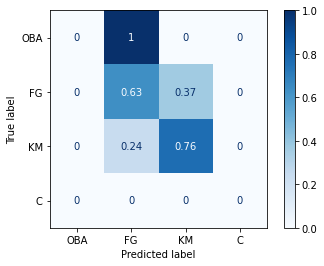

In [58]:
# MultinomialNB

## fitting a model

model4 = ComplementNB()
model4.fit(X_train2, y_train2)

## predicting labels

y_pred2 = model2.predict(X_test2)

## results

labels=['OBA', 'FG', 'KM', 'C']

ConfusionMatrixDisplay.from_estimator(
    model4,
    X_test2,
    y_test2,
    labels=labels,
    cmap=plt.cm.Blues,
    normalize='true',
) ### No ROC curves for multinomial classifications

Important to note here is that the distribution of spectral classes is uneven, most being F, G, K, M stars and hence the performance is poor in both models.